## HT 4. Árboles de decisión. Entrega Final

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = train.copy()

In [7]:
print(df.shape)

(1460, 81)


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [41]:
print("Columnas categóricas:", categorical_columns)
print("Columnas numéricas:", numerical_columns)

Columnas categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Columnas numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'G

In [42]:
# Obtener los nombres de las columnas transformadas
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    feature_names = preprocessor.get_feature_names()

In [45]:
df_preprocessed = preprocessor.fit_transform(df)
print(type(df_preprocessed))  # Debería ser <class 'numpy.ndarray'>
print(df_preprocessed.shape)  # Debería ser (1460, 304)

<class 'scipy.sparse._csr.csr_matrix'>
(1460, 304)


In [47]:
# Identificar columnas categóricas y numéricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Asegúrate de que 'SalePrice' no esté en las columnas numéricas si no quieres transformarla
numerical_columns = [col for col in numerical_columns if col != 'SalePrice']

# Preprocesador para columnas categóricas
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Usar sparse_output=False para evitar problemas

# Preprocesador para columnas numéricas (normalización)
numerical_preprocessor = StandardScaler()

# Crear el ColumnTransformer
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('scaler', numerical_preprocessor, numerical_columns)
])

# Aplicar el preprocesador
df_preprocessed = preprocessor.fit_transform(df)

# Verificar la forma de los datos transformados
print("Forma de los datos transformados:", df_preprocessed.shape)  # Debería ser (1460, 304)

# Obtener los nombres de las columnas transformadas
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    feature_names = preprocessor.get_feature_names()

# Convertir a DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=feature_names)

print(df_preprocessed.head())

Forma de los datos transformados: (1460, 304)
   one-hot-encoder__MSZoning_C (all)  one-hot-encoder__MSZoning_FV  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   one-hot-encoder__MSZoning_RH  one-hot-encoder__MSZoning_RL  \
0                           0.0                           1.0   
1                           0.0                           1.0   
2                           0.0                           1.0   
3                           0.0                           1.0   
4                           0.0                           1.0   

   one-hot-encoder__MSZoning_RM  one-hot-encoder__Street_Grvl  \
0                           0.0                           0.0   
1           

In [52]:
X = df_preprocessed  # Características preprocesadas
y = df['SalePrice']  # Variable objetivo

In [53]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Puntaje en entrenamiento: {train_score}")
print(f"Puntaje en prueba: {test_score}")

Puntaje en entrenamiento: 0.942733297793718
Puntaje en prueba: 0.3427759462302781


In [71]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

3. Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables.

In [80]:
# Crear el modelo de árbol de regresión
arbol_regresion = DecisionTreeRegressor(random_state=42)
arbol_regresion.fit(X_train, y_train)

# Hacer predicciones
predicciones = arbol_regresion.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Error cuadrático medio: {mse}")
print(f"R^2: {r2}")

Error cuadrático medio: 1203974909.375
R^2: 0.8549005193556583


Un R^2 de aproximadamente 0.85 indica que tu modelo de árbol de regresión explica el 85.5% de la variabilidad en los precios de las casas, lo cual es bastante bueno. Sin embargo, el error cuadrático medio (MSE) de aproximadamente 1,203,974,909.375 sugiere que hay margen de mejora, especialmente si los precios de las casas vienen siendo muy variados.

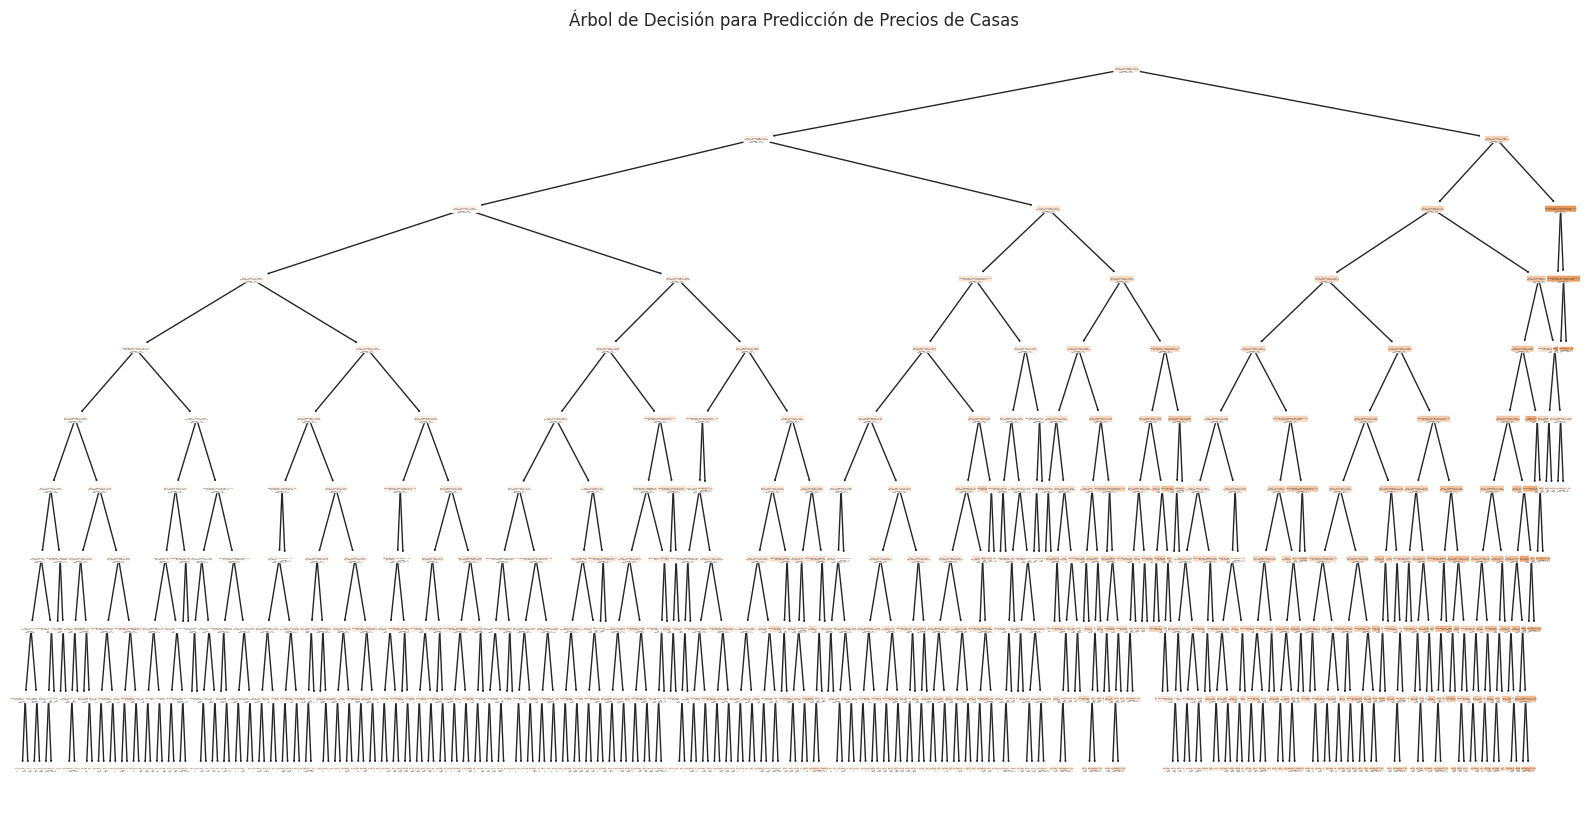

In [83]:
plt.figure(figsize=(20, 10))
plot_tree(arbol_regresion, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árbol de Decisión para Predicción de Precios de Casas")
plt.show()

In [84]:
importancia = arbol_regresion.feature_importances_
caracteristicas = X.columns

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({'Característica': caracteristicas, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print(importancia_df)

                        Característica  Importancia
271                scaler__OverallQual     0.661439
283                  scaler__GrLivArea     0.086714
281                   scaler__2ndFlrSF     0.063271
276                 scaler__BsmtFinSF1     0.037419
269                scaler__LotFrontage     0.018300
..                                 ...          ...
299                scaler__ScreenPorch     0.000000
300                   scaler__PoolArea     0.000000
301                    scaler__MiscVal     0.000000
3         one-hot-encoder__MSZoning_RL     0.000000
0    one-hot-encoder__MSZoning_C (all)     0.000000

[304 rows x 2 columns]


OverallQual tiene una importancia significativa (0.661), lo que indica que la calidad general de la casa es un predictor fuerte del precio.
GrLivArea (área habitable) también es relevante, aunque en menor medida (0.087).
Otras características como 2ndFlrSF y BsmtFinSF1 también contribuyen, pero en menor proporción.

4.  Haga, al menos, 3 modelos más, cambiando el parámetro de la profundidad del árbol. ¿Cuál
es el mejor modelo para predecir el precio de las casas?

In [81]:
profundidades = [3, 5, 7, 10]
resultados = {}

for profundidad in profundidades:
    arbol_regresion = DecisionTreeRegressor(max_depth=profundidad, random_state=42)
    arbol_regresion.fit(X_train, y_train)
    predicciones = arbol_regresion.predict(X_test)
    
    mse = mean_squared_error(y_test, predicciones)
    r2 = r2_score(y_test, predicciones)
    
    resultados[profundidad] = {'MSE': mse, 'R^2': r2}
    print(f"Profundidad: {profundidad}, MSE: {mse}, R^2: {r2}")

# Determinar el mejor modelo
mejor_modelo = min(resultados, key=lambda x: resultados[x]['MSE'])
print(f"La mejor profundidad es: {mejor_modelo} con MSE: {resultados[mejor_modelo]['MSE']}")

Profundidad: 3, MSE: 1923087463.6505494, R^2: 0.7682352098564976
Profundidad: 5, MSE: 1669414084.6845803, R^2: 0.7988071721579088
Profundidad: 7, MSE: 1549521388.8937578, R^2: 0.813256283810351
Profundidad: 10, MSE: 1456137388.8050504, R^2: 0.8245106461794112
La mejor profundidad es: 10 con MSE: 1456137388.8050504


 La profundidad 10 parece ser la mejor opción, ya que tiene el menor MSE y el mayor R^2.

5. Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo
mejor?

In [85]:
# Calcular los percentiles 33 y 66
Q1 = df['SalePrice'].quantile(0.33)
Q2 = df['SalePrice'].quantile(0.66)

# Crear la nueva variable categórica usando los percentiles
df['CategoriaPrecio'] = pd.cut(df['SalePrice'], bins=[-1, Q1, Q2, float('inf')], labels=['Económicas', 'Intermedias', 'Caras'])

# Mostrar las primeras filas del DataFrame con la nueva variable
print(df[['SalePrice', 'CategoriaPrecio']].head())

# Verificar la distribución de las categorías
print(df['CategoriaPrecio'].value_counts())

   SalePrice CategoriaPrecio
0     208500           Caras
1     181500     Intermedias
2     223500           Caras
3     140000     Intermedias
4     250000           Caras
CategoriaPrecio
Caras          497
Económicas     483
Intermedias    480
Name: count, dtype: int64
